<a href="https://colab.research.google.com/github/Aakash-mishra2/electricity-bill-by-devices-clustering/blob/main/Electricity_bill_management.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
electricity_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Indian Electricity_data/electricity_bill_dataset.csv', encoding = 'unicode_escape')
# Note: MSRP is the manufacturer's suggested retail price (MSRP) or sticker price represents the suggested retail price of products.
# MSRP is used to standardize the price of products over multiple company store locations.

In [100]:
electricity_df

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  \
0       16          23.0             2.0         6.0      1.0          0   
1       19          22.0             2.0         3.0      1.0          0   
2        7          20.0             2.0         6.0      7.0          0   
3        7          22.0             3.0        21.0      1.0          0   
4       11          23.0             2.0        11.0      1.0          0   
...    ...           ...             ...         ...      ...        ...   
45340   18          22.0             3.0        22.0      1.0          0   
45341   23          23.0             2.0         6.0     12.0          0   
45342   22          22.0             2.0        20.0      1.0          0   
45343    8          21.0             2.0        22.0      7.0          0   
45344    8          17.0             2.0         4.0      1.0          0   

       Month       City                                            Company  \
0         10  Hyderabad                            Tata Power Company Ltd.   
1          5   Vadodara                                               NHPC   
2          7     Shimla                                    Jyoti Structure   
3          6     Mumbai                                    Power Grid Corp   
4          2     Mumbai          Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)   
...      ...        ...                                                ...   
45340      9  Ahmedabad  Maha Transco â Maharashtra State Electricity...   
45341      2  New Delhi                                       Orient Green   
45342      1  New Delhi                               GE T&D India Limited   
45343     12  Ratnagiri                                 TransRail Lighting   
45344      1    Gurgaon                    L&T Transmission & Distribution   

       MonthlyHours  TariffRate  ElectricityBill  
0               384         8.4           3225.6  
1               488         7.8           3806.4  
2               416         7.7           3203.2  
3               475         9.2           4370.0  
4               457         9.2           4204.4  
...             ...         ...              ...  
45340           764         7.9           6035.6  
45341           572         8.5           4862.0  
45342           609         8.5           5176.5  
45343           748         7.4           5535.2  
45344           427         8.3           3544.1  

[45345 rows x 12 columns]

In [101]:
electricity_df.dtypes

Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Month                int64
City                object
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
dtype: object

In [102]:
electricity_df.nunique()

Fan                  19
Refrigerator          7
AirConditioner        4
Television           20
Monitor               3
MotorPump             1
Month                12
City                 16
Company              32
MonthlyHours        748
TariffRate           16
ElectricityBill    8122
dtype: int64

In [103]:
electricity_df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [104]:
electricity_df.isnull().sum()

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

In [105]:
electricity_df['City'].value_counts()

Hyderabad      2914
Navi Mumbai    2914
Ratnagiri      2892
Faridabad      2891
Gurgaon        2878
Ahmedabad      2868
New Delhi      2848
Mumbai         2846
Chennai        2834
Dahej          2821
Nagpur         2816
Noida          2793
Pune           2788
Shimla         2780
Kolkata        2740
Vadodara       2722
Name: City, dtype: int64

In [106]:
electricity_df['Month'].value_counts()

9     3970
8     3885
3     3829
6     3813
1     3788
11    3787
4     3780
2     3768
5     3711
7     3710
12    3680
10    3624
Name: Month, dtype: int64

In [107]:
electricity_df['Fan'].value_counts()

15    2505
9     2486
7     2457
22    2443
16    2433
10    2401
19    2401
8     2384
21    2380
20    2367
14    2360
5     2359
17    2357
18    2347
6     2340
11    2337
12    2336
13    2336
23    2316
Name: Fan, dtype: int64

In [108]:
elec_df_group = electricity_df.groupby(by='ElectricityBill').sum()
elec_df_group

<ipython-input-108-f028dc7eb3a4>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Fan  Refrigerator  AirConditioner  Television  Monitor  \
ElectricityBill                                                           
807.5              5          17.0             0.0         3.0      1.0   
1033.2             6          20.0             0.0         3.0      1.0   
1034.9             8          18.0             0.0         3.0      1.0   
1048.8             6          17.0             0.0         5.0      1.0   
1069.5             8          17.0             0.0         3.0      1.0   
...              ...           ...             ...         ...      ...   
8171.8            22          23.0             2.0        22.0     12.0   
8202.6            19          22.0             2.0        22.0     12.0   
8206.4            23          23.0             3.0        19.0     12.0   
8230.5            17          23.0             3.0        22.0     12.0   
8286.3            18          23.0             3.0        22.0     12.0   

                 MotorPump  Month  MonthlyHours  TariffRate  
ElectricityBill                                              
807.5                    0      2            95         8.5  
1033.2                   0      2           126         8.2  
1034.9                   0      2           131         7.9  
1048.8                   0      2           114         9.2  
1069.5                   0      9           115         9.3  
...                    ...    ...           ...         ...  
8171.8                   0     12           898         9.1  
8202.6                   0      3           882         9.3  
8206.4                   0      7           892         9.2  
8230.5                   0      4           885         9.3  
8286.3                   0     11           891         9.3  

[8122 rows x 9 columns]

In [109]:
fig = px.line(x=elec_df_group.index, y=elec_df_group.Month, title="MONTH-WISE-BILL")
fig.show()

In [110]:
elec_df_group['Month'].value_counts()

12     221
11     206
10     185
9      178
7      170
      ... 
178      1
159      1
153      1
158      1
127      1
Name: Month, Length: 178, dtype: int64

In [111]:
#function to store count of items in a given column
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = electricity_df[x].value_counts().index, y = electricity_df[x].value_counts(), color = electricity_df[x].value_counts().index, height = 600)
  fig.show()
def barplot_visualization2(x):
  fig2 = plt.Figure(figsize = (12, 6))
  fig2 = px.bar(x = elec_df_group[x].value_counts().index, y = elec_df_group[x].value_counts(), color = elec_df_group[x].value_counts().index, height = 600)
  fig2.show()

In [112]:
barplot_visualization('MonthlyHours')

In [113]:
barplot_visualization('Company')

In [114]:
electricity_df.head()

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8           3806.4  
2         7.7           3203.2  
3         9.2           4370.0  
4         9.2           4204.4

In [116]:
def dummies(x):
  dummy = pd.get_dummies(electricity_df[x])
  electricity_df.drop(columns = x , inplace = True)
  return pd.concat([electricity_df, dummy], axis = 1)

In [117]:
#remove categorial variables
electricity_df = dummies('Month')
electricity_df

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  \
0       16          23.0             2.0         6.0      1.0          0   
1       19          22.0             2.0         3.0      1.0          0   
2        7          20.0             2.0         6.0      7.0          0   
3        7          22.0             3.0        21.0      1.0          0   
4       11          23.0             2.0        11.0      1.0          0   
...    ...           ...             ...         ...      ...        ...   
45340   18          22.0             3.0        22.0      1.0          0   
45341   23          23.0             2.0         6.0     12.0          0   
45342   22          22.0             2.0        20.0      1.0          0   
45343    8          21.0             2.0        22.0      7.0          0   
45344    8          17.0             2.0         4.0      1.0          0   

            City                                            Company  \
0      Hyderabad                            Tata Power Company Ltd.   
1       Vadodara                                               NHPC   
2         Shimla                                    Jyoti Structure   
3         Mumbai                                    Power Grid Corp   
4         Mumbai          Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)   
...          ...                                                ...   
45340  Ahmedabad  Maha Transco â Maharashtra State Electricity...   
45341  New Delhi                                       Orient Green   
45342  New Delhi                               GE T&D India Limited   
45343  Ratnagiri                                 TransRail Lighting   
45344    Gurgaon                    L&T Transmission & Distribution   

       MonthlyHours  TariffRate  ...  3  4  5  6  7  8  9  10  11  12  
0               384         8.4  ...  0  0  0  0  0  0  0   1   0   0  
1               488         7.8  ...  0  0  1  0  0  0  0   0   0   0  
2               416         7.7  ...  0  0  0  0  1  0  0   0   0   0  
3               475         9.2  ...  0  0  0  1  0  0  0   0   0   0  
4               457         9.2  ...  0  0  0  0  0  0  0   0   0   0  
...             ...         ...  ... .. .. .. .. .. .. ..  ..  ..  ..  
45340           764         7.9  ...  0  0  0  0  0  0  1   0   0   0  
45341           572         8.5  ...  0  0  0  0  0  0  0   0   0   0  
45342           609         8.5  ...  0  0  0  0  0  0  0   0   0   0  
45343           748         7.4  ...  0  0  0  0  0  0  0   0   0   1  
45344           427         8.3  ...  0  0  0  0  0  0  0   0   0   0  

[45345 rows x 23 columns]

In [118]:
electricity_df = dummies('City')
electricity_df

Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  \
0       16          23.0             2.0         6.0      1.0          0   
1       19          22.0             2.0         3.0      1.0          0   
2        7          20.0             2.0         6.0      7.0          0   
3        7          22.0             3.0        21.0      1.0          0   
4       11          23.0             2.0        11.0      1.0          0   
...    ...           ...             ...         ...      ...        ...   
45340   18          22.0             3.0        22.0      1.0          0   
45341   23          23.0             2.0         6.0     12.0          0   
45342   22          22.0             2.0        20.0      1.0          0   
45343    8          21.0             2.0        22.0      7.0          0   
45344    8          17.0             2.0         4.0      1.0          0   

                                                 Company  MonthlyHours  \
0                                Tata Power Company Ltd.           384   
1                                                   NHPC           488   
2                                        Jyoti Structure           416   
3                                        Power Grid Corp           475   
4              Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   
...                                                  ...           ...   
45340  Maha Transco â Maharashtra State Electricity...           764   
45341                                       Orient Green           572   
45342                               GE T&D India Limited           609   
45343                                 TransRail Lighting           748   
45344                    L&T Transmission & Distribution           427   

       TariffRate  ElectricityBill  ...  Kolkata  Mumbai  Nagpur  Navi Mumbai  \
0             8.4           3225.6  ...        0       0       0            0   
1             7.8           3806.4  ...        0       0       0            0   
2             7.7           3203.2  ...        0       0       0            0   
3             9.2           4370.0  ...        0       1       0            0   
4             9.2           4204.4  ...        0       1       0            0   
...           ...              ...  ...      ...     ...     ...          ...   
45340         7.9           6035.6  ...        0       0       0            0   
45341         8.5           4862.0  ...        0       0       0            0   
45342         8.5           5176.5  ...        0       0       0            0   
45343         7.4           5535.2  ...        0       0       0            0   
45344         8.3           3544.1  ...        0       0       0            0   

       New Delhi  Noida  Pune  Ratnagiri  Shimla  Vadodara  
0              0      0     0          0       0         0  
1              0      0     0          0       0         1  
2              0      0     0          0       1         0  
3              0      0     0          0       0         0  
4              0      0     0          0       0         0  
...          ...    ...   ...        ...     ...       ...  
45340          0      0     0          0       0         0  
45341          1      0     0          0       0         0  
45342          1      0     0          0       0         0  
45343          0      0     0          1       0         0  
45344          0      0     0          0       0         0  

[45345 rows x 38 columns]

In [119]:
elec_df_group = electricity_df.groupby(by='MonthlyHours').sum()
elec_df_group

<ipython-input-119-c32363936c0e>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Fan  Refrigerator  AirConditioner  Television  Monitor  \
MonthlyHours                                                           
95              5          17.0             0.0         3.0      1.0   
114             6          17.0             0.0         5.0      1.0   
115             8          17.0             0.0         3.0      1.0   
126             6          20.0             0.0         3.0      1.0   
131            14          35.0             0.0         6.0      2.0   
...           ...           ...             ...         ...      ...   
910            46          45.0             6.0        42.0     24.0   
913            23          22.0             2.0        22.0     12.0   
917            19          23.0             3.0        21.0     12.0   
924            21          22.0             3.0        22.0     12.0   
926            23          23.0             3.0        19.0     12.0   

              MotorPump  TariffRate  ElectricityBill  1  2  ...  Kolkata  \
MonthlyHours                                                ...            
95                    0         8.5            807.5  0  1  ...        0   
114                   0         9.2           1048.8  0  1  ...        0   
115                   0         9.3           1069.5  0  0  ...        0   
126                   0         8.2           1033.2  0  1  ...        0   
131                   0        17.1           2240.1  0  1  ...        0   
...                 ...         ...              ... .. ..  ...      ...   
910                   0        17.1          15561.0  0  0  ...        1   
913                   0         8.3           7577.9  0  0  ...        0   
917                   0         8.4           7702.8  0  0  ...        0   
924                   0         8.8           8131.2  0  0  ...        0   
926                   0         8.5           7871.0  0  0  ...        0   

              Mumbai  Nagpur  Navi Mumbai  New Delhi  Noida  Pune  Ratnagiri  \
MonthlyHours                                                                   
95                 0       0            0          1      0     0          0   
114                1       0            0          0      0     0          0   
115                0       0            1          0      0     0          0   
126                0       0            0          0      1     0          0   
131                1       0            0          0      0     0          0   
...              ...     ...          ...        ...    ...   ...        ...   
910                0       0            0          0      0     0          0   
913                0       0            0          0      0     0          0   
917                0       0            0          0      0     0          0   
924                0       0            0          0      0     0          0   
926                0       0            0          1      0     0          0   

              Shimla  Vadodara  
MonthlyHours                    
95                 0         0  
114                0         0  
115                0         0  
126                0         0  
131                0         0  
...              ...       ...  
910                0         0  
913                0         0  
917                0         0  
924                0         0  
926                0         0  

[748 rows x 36 columns]

In [120]:
fig = px.line(x=elec_df_group.index, y=elec_df_group.ElectricityBill, title="Electricity Bill segmentation")
fig.show()

In [121]:
elec_df_group.drop("TariffRate", axis = 1, inplace = True)
elec_df_group.shape

(748, 35)

<Axes: >

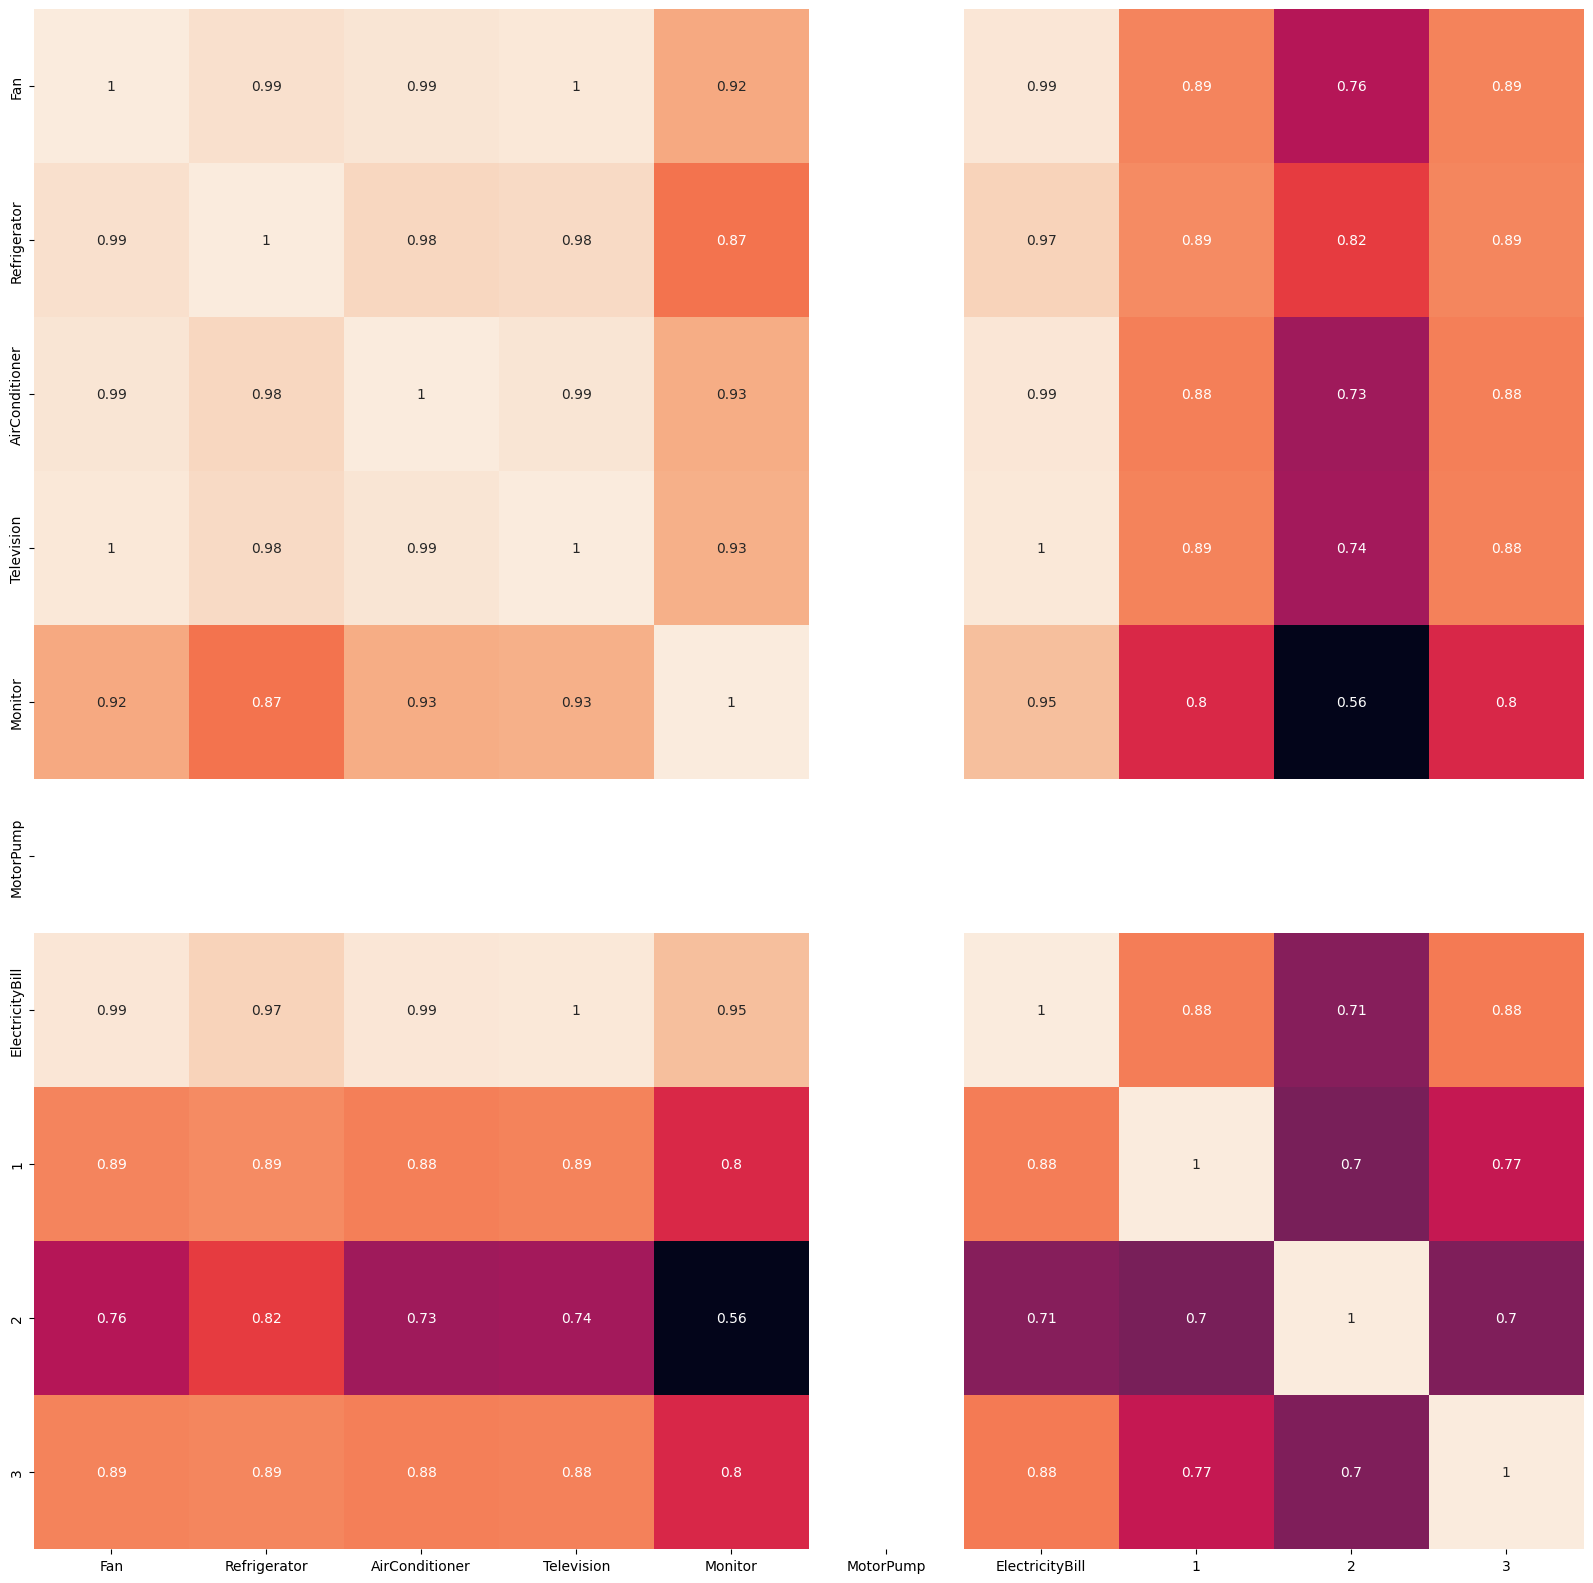

In [122]:
plt.figure(figsize = (20, 20))
corr_matrix = elec_df_group.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [123]:
elec_df_group.drop('MotorPump', axis=1,inplace = True)
elec_df_group.shape

(748, 34)

In [124]:
electricity_df.dtypes

Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
1                    uint8
2                    uint8
3                    uint8
4                    uint8
5                    uint8
6                    uint8
7                    uint8
8                    uint8
9                    uint8
10                   uint8
11                   uint8
12                   uint8
Ahmedabad            uint8
Chennai              uint8
Dahej                uint8
Faridabad            uint8
Gurgaon              uint8
Hyderabad            uint8
Kolkata              uint8
Mumbai               uint8
Nagpur               uint8
Navi Mumbai          uint8
New Delhi            uint8
Noida                uint8
Pune                 uint8
Ratnagiri            uint8
Shimla               uint8
V

In [125]:
electricity_df.drop('MotorPump', axis = 1, inplace = True)
electricity_df.head()


Fan  Refrigerator  AirConditioner  Television  Monitor  \
0   16          23.0             2.0         6.0      1.0   
1   19          22.0             2.0         3.0      1.0   
2    7          20.0             2.0         6.0      7.0   
3    7          22.0             3.0        21.0      1.0   
4   11          23.0             2.0        11.0      1.0   

                                     Company  MonthlyHours  TariffRate  \
0                    Tata Power Company Ltd.           384         8.4   
1                                       NHPC           488         7.8   
2                            Jyoti Structure           416         7.7   
3                            Power Grid Corp           475         9.2   
4  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457         9.2   

   ElectricityBill  1  ...  Kolkata  Mumbai  Nagpur  Navi Mumbai  New Delhi  \
0           3225.6  0  ...        0       0       0            0          0   
1           3806.4  0  ...        0       0       0            0          0   
2           3203.2  0  ...        0       0       0            0          0   
3           4370.0  0  ...        0       1       0            0          0   
4           4204.4  0  ...        0       1       0            0          0   

   Noida  Pune  Ratnagiri  Shimla  Vadodara  
0      0     0          0       0         0  
1      0     0          0       0         1  
2      0     0          0       1         0  
3      0     0          0       0         0  
4      0     0          0       0         0  

[5 rows x 37 columns]

In [126]:
import plotly.figure_factory as ff

plt.figure(figsize = (10, 10))

for i in range(10):
  if electricity_df.columns[i] != 'TariffRate':
    fig = ff.create_distplot([electricity_df[electricity_df.columns[i]].apply(lambda x: float(x))], ['distplot'])
    fig.update_layout(title_text = electricity_df.columns[i])
    fig.show()

ValueError: ignored

<Figure size 1000x1000 with 0 Axes>